## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문 과정

#### 교과목명: 딥러닝알고리즘 구현
- 평가일: 220422
- 성명: 권혁종
- 점수: 100

Q1. 사람이 문장을 읽는 것처럼 이전에 나온 것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리하여 문장에 있은 의미를 자연스럽게 표현하려는 목적으로 과거 정보를 사용하고 새롭게 얻은 정보를 계속 업데이트하는 방식이 순환 신경망(RNN) 이다. SimpleRNN을 활용하여 IMDB 영화 리뷰 데이터에 대하여 아래 사항을 수행하세요.
- 데이터 전처리 : max_features 10000, maxlen = 500, batch_size 32
- 케라스를 사용하여 입력 시퀀스에 대한 마지막 출력만 반환하는 방식으로 모델링.(embedding 층 입력 (max_features, 32))
- 학습 및 검증 옵션 : epochs 10, batch_size 128, 검증 데이터 20%
※ 학습시간 20분
- 훈련과 검증의 손실과 정확도를 그래프로 표현
- 검증 정확도를 확인하고 동 사례에 SimpleRNN 모델의 적합 여부 및 개선 방안에 대하여 기술하세요.

In [ ]:
from tensorflow.keras.layers import SimpleRNN,Dense,LSTM,Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32

(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words = max_features)
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print(input_train.shape)
print(input_test.shape)

(25000, 500)
(25000, 500)


In [ ]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 77s 461ms/step - loss: 0.6275 - acc: 0.6347 - val_loss: 0.4807 - val_acc: 0.7884
Epoch 2/10
157/157 [==============================] - 94s 598ms/step - loss: 0.4169 - acc: 0.8206 - val_loss: 0.3701 - val_acc: 0.8470
Epoch 3/10
157/157 [==============================] - 79s 506ms/step - loss: 0.2950 - acc: 0.8834 - val_loss: 0.4713 - val_acc: 0.8084
Epoch 4/10
157/157 [==============================] - 73s 467ms/step - loss: 0.2210 - acc: 0.9157 - val_loss: 0.3624 - val_acc: 0.8578
Epoch 5/10
157/157 [==============================] - 84s 532ms/step - loss: 0.1615 - acc: 0.9406 - val_loss: 0.4416 - val_acc: 0.8504
Epoch 6/10
157/157 [==============================] - 91s 578ms/step - loss: 0.1092 - acc: 0.9622 - val_loss: 0.4389 - val_acc: 0.8360
Epoch 7/10
157/157 [==============================] - 84s 536ms/step - loss: 0.0663 - acc: 0.9787 - val_loss: 0.5631 - val_acc: 0.8322
Epoch 8/10
157/157 [==============================] - 9

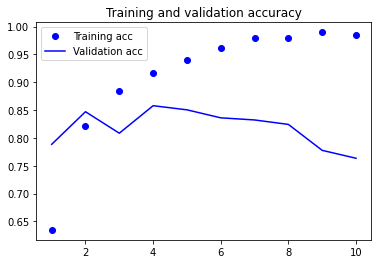

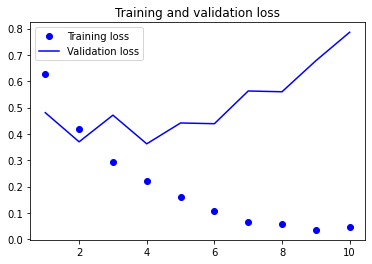

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b-',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b-',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

lstm 모델보다 시간이 오래걸렸는데 정확도는 떨어진다. 따라서 SimpleRNN의 경우에는 긴 텍스트 처리에 어울리지 않다.  
또한 입력 단어 수가 500개에 불과하기에 정보가 적어서 성능이 떨어지는것도 있다.  
max_len을 늘리면 성능에 개선은 되겠지만 비용이 증가할 것

Q2. Q1 문제를 LSTM 모델을 적용하여 수행하세요
- 모델링, 학습 및 검증
- 결과 시각화

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features,32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation = 'sigmoid'))

model_lstm.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history_lstm = model_lstm.fit(input_train, y_train,
                          epochs = 10,
                          batch_size = 128,
                          validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 8s 23ms/step - loss: 0.5298 - acc: 0.7551 - val_loss: 0.7784 - val_acc: 0.6684
Epoch 2/10
157/157 [==============================] - 3s 19ms/step - loss: 0.3058 - acc: 0.8812 - val_loss: 0.3180 - val_acc: 0.8702
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2432 - acc: 0.9072 - val_loss: 0.3034 - val_acc: 0.8730
Epoch 4/10
157/157 [==============================] - 3s 19ms/step - loss: 0.2021 - acc: 0.9247 - val_loss: 0.3100 - val_acc: 0.8744
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1790 - acc: 0.9362 - val_loss: 0.3588 - val_acc: 0.8502
Epoch 6/10
157/157 [==============================] - 3s 19ms/step - loss: 0.1554 - acc: 0.9439 - val_loss: 0.2947 - val_acc: 0.8876
Epoch 7/10
157/157 [==============================] - 3s 19ms/step - loss: 0.1408 - acc: 0.9495 - val_loss: 0.3431 - val_acc: 0.8886
Epoch 8/10
157/157 [==============================] - 4s 24ms/step - 

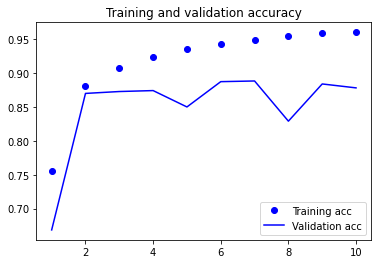

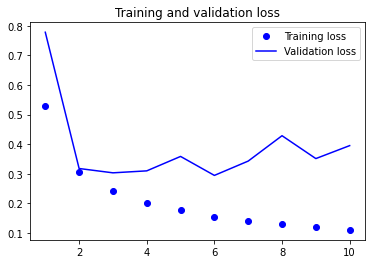

In [ ]:
import matplotlib.pyplot as plt

acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b-',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b-',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Q3. MNIST 숫자 이미지 데이터에 대하여 CNN 모델을 사용하여 아래사항을 수행하세요
- Conv2D와 MaxPooling2D 층을 사용하여 컨브넷을 생성(채널의 수 32개 또는 64개)
- 출력 텐서를 완전 연결 네트워크에 주입
- 10개의 클래스 분류하기 위한 분류기 추가
- 컨브넷 학습 및 평가

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten

model_cnn = Sequential()
# 컨브넷 생성
model_cnn.add(Conv2D(32, (3,3), activation = 'relu',input_shape = (28,28,1)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64,(3,3), activation = 'relu'))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64,(3,3), activation = 'relu'))
# 완전연결 네트워크에 주입
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation = 'relu'))
# 분류기
model_cnn.add(Dense(10, activation = 'softmax'))

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [ ]:
# 데이터 전처리

(train_images , train_labels) , (test_images,test_labels) = mnist.load_data()
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 모델 컴파일 및 학습
model_cnn.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['acc'])
model_cnn.fit(train_images,train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 14s 6ms/step - loss: 0.1662 - acc: 0.9487
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0455 - acc: 0.9858
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0314 - acc: 0.9903
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0237 - acc: 0.9927
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0179 - acc: 0.9941


In [ ]:
# 모델 평가
model_cnn.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0467 - acc: 0.9867


[0.04671785607933998, 0.9866999983787537]

정확도 0.9867 정도로 우수한 성능

Q4. cats_and_dogs_small으로 축소한 데이터 셋으로 사전 훈련된 네트워크를 사용하여 강아지 고양이 분류 과제를 아래와 같이 수행하세요.
- ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반 층을 사용하여 유용한 특성 추출하고 이 특성으로 분류기 훈련
- ImageDataGenerator 사용 (※ 소요시간 20분)
- VGG 매개변수
 - weights는 모델을 초기화할 가중치 체크포인트를 지정 : 'imagenet'
 - include_top은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정 : False
 - input_shape은 네트워크에 주입할 이미지 텐서의 크기 :(150.150,3)
- 데이터 증식을 사용하지 않는 방법으로 수행
- 완전 연결 분류기를 정의하고 규제를 위해 드롭아웃 사용 : 0.5

In [ ]:
# 모델 구성
from tensorflow.keras.applications import VGG16

model_vgg16 = VGG16(weights = 'imagenet',
                    include_top = False,
                    input_shape = (150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# 특성 추출
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

train_dir = '/content/drive/MyDrive/Colab Notebooks/m9_딥러닝알고리즘구현/dataset/cats_and_dogs_small/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/m9_딥러닝알고리즘구현/dataset/cats_and_dogs_small/test'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/m9_딥러닝알고리즘구현/dataset/cats_and_dogs_small/validation'

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

# 특성 추출하는 사용자 함수
def extract_feature(directory, sample_count):
  features = np.zeros(shape = (sample_count, 4, 4, 512))
  labels = np.zeros(shape = (sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = 'binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = model_vgg16.predict(inputs_batch)
    features[i * batch_size : (i+1) * batch_size] = features_batch
    labels[i * batch_size : (i+1) * batch_size] = labels_batch
    i+=1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_feature(train_dir, 2000)
validation_features, validation_labels = extract_feature(validation_dir, 1000)
test_features, test_labels = extract_feature(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features.shape

(2000, 4, 4, 512)

In [ ]:
train_features = np.reshape(train_features, (2000,4 *4 * 512))
validation_features = np.reshape(validation_features, (1000,4 *4 * 512))
test_features = np.reshape(test_features, (1000,4 *4 * 512))

In [ ]:
# 완전 연결 분류기에 연결 (Dropout = 0.5)
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

model_clf = Sequential()
model_clf.add(Dense(256, activation= 'relu', input_dim = 4 * 4 * 512))
model_clf.add(Dropout(0.5))
model_clf.add(Dense(1, activation = 'sigmoid'))
model_clf.summary()

model_clf.compile(optimizer = RMSprop(lr = 2e-5),
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 1)                 257       
                                                                 
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history_clf = model_clf.fit(train_features, train_labels,
                            epochs = 30,
                            batch_size = 20,
                            validation_data = (validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.6043 - acc: 0.6565 - val_loss: 0.4447 - val_acc: 0.8410
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.4367 - acc: 0.8075 - val_loss: 0.3645 - val_acc: 0.8780
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3563 - acc: 0.8505 - val_loss: 0.3215 - val_acc: 0.8870
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3191 - acc: 0.8615 - val_loss: 0.3038 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2931 - acc: 0.8840 - val_loss: 0.2838 - val_acc: 0.8970
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2632 - acc: 0.9030 - val_loss: 0.2707 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2490 - acc: 0.9030 - val_loss: 0.2722 - val_acc: 0.8930
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

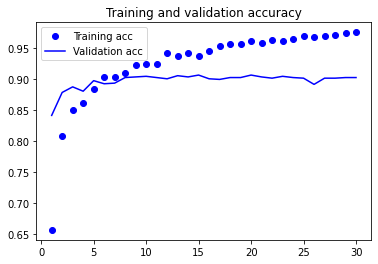

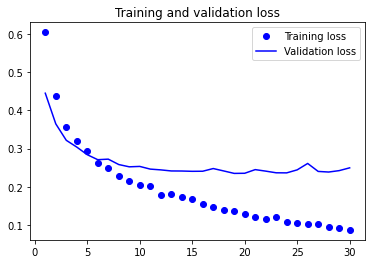

In [ ]:
import matplotlib.pyplot as plt

acc = history_clf.history['acc']
val_acc = history_clf.history['val_acc']
loss = history_clf.history['loss']
val_loss = history_clf.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b-',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b-',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

약 epochs 10~15 사이에서부터 과대적합이 시작됨 성능은 정확도 약 0.9정도

Q5. Q4 문제를 데이터 증식을 사용한 방식으로 수행하세요.

In [ ]:
# 모델을 VGG16에 분류기까지 합쳐서 생성

model_vgg_clf = Sequential()
model_vgg_clf.add(model_vgg16)
model_vgg_clf.add(Flatten())
model_vgg_clf.add(Dense(256, activation = 'relu'))
model_vgg_clf.add(Dense(1, activation = 'sigmoid'))
model_vgg_clf.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_37 (Dense)            (None, 256)               2097408   
                                                                 
 dense_38 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 현재 훈련되는 가중치 수
len(model_vgg_clf.trainable_weights)

30

In [ ]:
# 마지막 2개의 층만 훈련되도록 동결
model_vgg16.trainable = False
len(model_vgg_clf.trainable_weights)

4

In [ ]:
# 학습데이터 데이터증식 적용
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

model_vgg_clf.compile(optimizer = RMSprop(lr = 2e-5),
                      loss = 'binary_crossentropy',
                      metrics = ['acc'])

history_vgg_clf = model_vgg_clf.fit(train_generator,
                                   steps_per_epoch = 100,
                                   epochs = 30,
                                   validation_data = validation_generator,
                                   validation_steps = 50,
                                   verbose = 2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
100/100 - 25s - loss: 0.5502 - acc: 0.7250 - val_loss: 0.4222 - val_acc: 0.8340 - 25s/epoch - 255ms/step
Epoch 2/30
100/100 - 22s - loss: 0.3988 - acc: 0.8390 - val_loss: 0.3425 - val_acc: 0.8630 - 22s/epoch - 221ms/step
Epoch 3/30
100/100 - 23s - loss: 0.3518 - acc: 0.8545 - val_loss: 0.3015 - val_acc: 0.8850 - 23s/epoch - 227ms/step
Epoch 4/30
100/100 - 22s - loss: 0.3174 - acc: 0.8725 - val_loss: 0.2855 - val_acc: 0.8930 - 22s/epoch - 221ms/step
Epoch 5/30
100/100 - 24s - loss: 0.2958 - acc: 0.8785 - val_loss: 0.2712 - val_acc: 0.8920 - 24s/epoch - 240ms/step
Epoch 6/30
100/100 - 27s - loss: 0.2743 - acc: 0.8930 - val_loss: 0.2682 - val_acc: 0.8920 - 27s/epoch - 272ms/step
Epoch 7/30
100/100 - 22s - loss: 0.2683 - acc: 0.8965 - val_loss: 0.2530 - val_acc: 0.8970 - 22s/epoch - 220ms/step
Epoch 8/30
100/100 - 22s - loss: 0.2585 - acc: 0.8905 - val_loss: 0.2492 - val_acc: 0.8960 - 22s/epoch - 220ms/step
Epoch 9/30
100/100 - 22s - loss: 0.2368 - acc: 0.9080 - val_loss: 0.2437

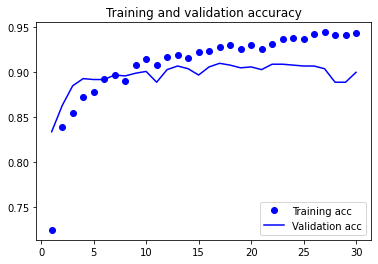

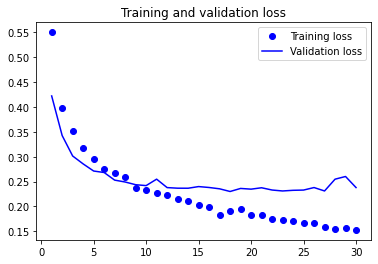

In [ ]:
import matplotlib.pyplot as plt

acc = history_vgg_clf.history['acc']
val_acc = history_vgg_clf.history['val_acc']
loss = history_vgg_clf.history['loss']
val_loss = history_vgg_clf.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b-',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b-',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

성능은 약 0.91정도로 약간 더 상승하였고, 과대적합이 약 18~20 구간부터 시작되는것으로 보임  
데이터 증식의 효과로 성능 상향과 과대적합 제어가 눈에 띄인다.